# What drives the price of a car?

![](images/kurt.jpeg)

<div class="alert alert-block alert-warning">
<h1 style="color: black;"><b>OVERVIEW</b></h1>
<font color='black'>In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.</br>

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

<div class="alert alert-block alert-success">
<h1 style="color: black;"><b>Business Understanding</b></h1>
<font color='black'>From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.</br>
<h3><br>My goal is to create a predictive model to determine used car prices based on various features. I'll start by performing exploratory data analysis (EDA) to pinpoint the key factors that influence car prices. Then, I'll clean the data to address any missing values and outliers. Using regression techniques, I'll model the relationship between car attributes—such as make, model, year, mileage, and condition—and their prices. Ultimately, I'll provide actionable insights and recommendations to help the used car dealership refine their pricing strategy.</h3></font>
</div>

<div class="alert alert-block alert-success">
<h1 style="color: black;"><b>Data Understanding</b></h1>
<font color='black'>After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.</font>
</div>

<div class="alert alert-block alert-info">
<h2 style="color: black;"><b>Steps to Get Familiar with the Dataset</b></h2>
<font color='black'><h3>First off, I need to dive into the dataset and get a good feel for what's in there. Here’s how I’d go about it:</font>
</div></h3>

1. **Load the Data**: Load the dataset into a Pandas DataFrame for easy manipulation and analysis.</br>
<br>
2. **Initial Inspection**:
   - **View the First Few Rows**: Use `head()` to examine the first few rows of the dataset to understand its structure and content.
   - **Summary Statistics**: Use `describe()` to generate summary statistics for numerical columns, helping to understand the distribution and identify any outliers.
   - **Info and Data Types**: Use `info()` to check the data types of each column and identify any missing values.</br>
<br>
3. **Missing Values Analysis**:
   - **Identify Missing Values**: Use `isnull().sum()` to count the number of missing values in each column.
   - **Visualize Missing Data**: Create a heatmap or bar plot to visualize the extent of missing data across different columns.</br>
<br>
4. **Exploratory Data Analysis (EDA)**:
   - **Univariate Analysis**: Examine the distribution of each feature individually. Use bar plots for categorical variables and histograms or box plots for numerical variables.
   - **Bivariate Analysis**: Explore relationships between pairs of variables, especially with respect to the target variable (price). Use scatter plots, correlation matrices, and pair plots.</br>
<br>
5. **Data Quality Checks**:
   - **Outliers Detection**: Identify outliers in numerical features using box plots or Z-scores.
   - **Consistency Checks**: Ensure that categorical variables have consistent and meaningful categories (e.g., no typos in manufacturer names).
   - **Duplicates**: Check for and handle any duplicate rows in the dataset.</br>
<br>
6. **Feature Engineering**:
   - **Create New Features**: Based on initial exploration, create new features that might be useful for the model. For example, calculate the age of the car from the year or categorize mileage into bins.
   - **Feature Transformation**: Transform features if necessary (e.g., log transformation for highly skewed data).</br>
<br>
7. **Document Findings**:
   - **Record Observations**: Document any patterns, anomalies, or insights discovered during the EDA. This helps in forming hypotheses about which features might be important for the predictive model.
   - **Business Relevance**: Relate the findings back to the business understanding to ensure that the insights align with the business objectives.</br>
<br>

<h3>By going through these steps, I’ll gain a comprehensive understanding of the dataset and get it ready for building a solid predictive model.</h3>


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Load the dataset
file_path = 'C:/Users/Tim/Downloads/Modules/module_11/practical_application_II_starter/data/vehicles.csv'
vehicles_df = pd.read_csv(file_path)

vehicles_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
vehicles_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

<div class="alert alert-block alert-info">
<h2 style="color: black;">Identify and Visualize Missing Values</h2>
</div>

<div class="alert alert-block alert-info">
<h3 style="color: black;">Count Missing Values:</h3>
</div>

In [7]:
# Count the number of missing values in each column
missing_values_count = vehicles_df.isnull().sum()
print(missing_values_count)


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [8]:
# Percentage of missing values in each column
missing_percentage = (vehicles_df.isnull().sum() / len(vehicles_df)) * 100
print(missing_percentage)

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


<div class="alert alert-block alert-info">
<h3 style="color: black;">Visualize Missing Values:</h3>
</div>

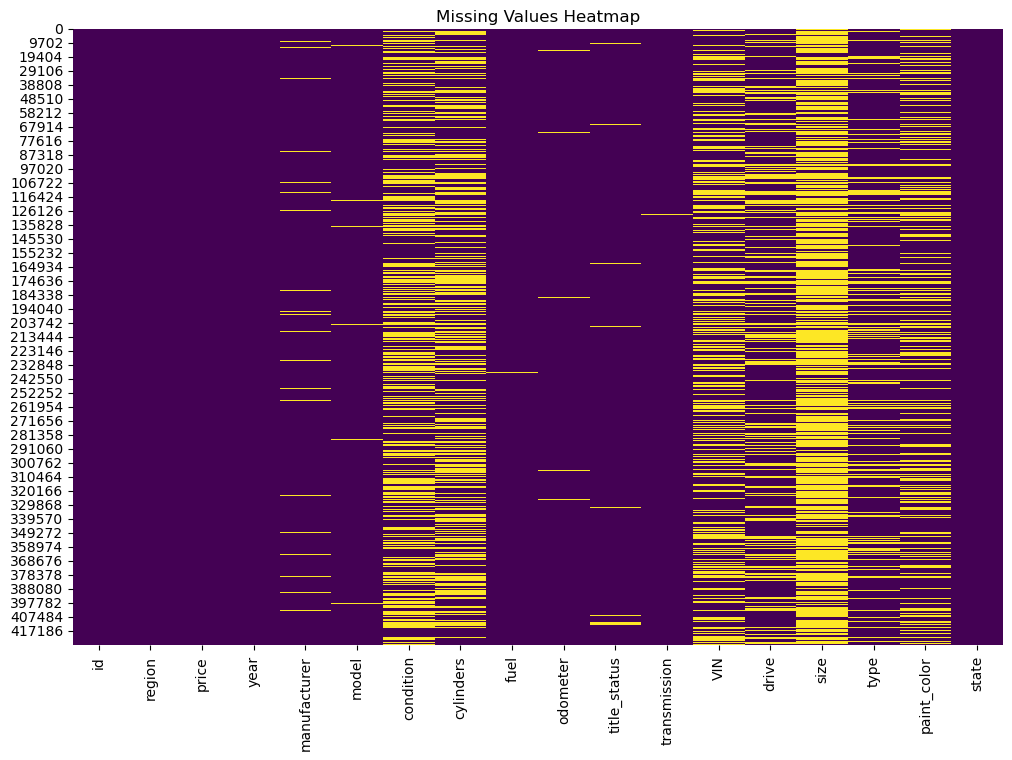

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(vehicles_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


<div class="alert alert-block alert-info">
<h3 style="color: black;">Handle Missing Values</h3>
</div>

In [10]:
# Drop Columns with Too Many Missing Values
threshold = 0.5 * len(vehicles_df)
vehicles_df = vehicles_df.dropna(thresh=threshold, axis=1)


In [11]:
# Handle missing values for numerical features
vehicles_df['year'] = vehicles_df['year'].fillna(vehicles_df['year'].median())
vehicles_df['odometer'] = vehicles_df['odometer'].fillna(vehicles_df['odometer'].median())

# Handle missing values for categorical features
vehicles_df['manufacturer'] = vehicles_df['manufacturer'].fillna('Unknown')
vehicles_df['model'] = vehicles_df['model'].fillna('Unknown')

# Confirm the changes by checking the count of missing values again
missing_values_count_after = vehicles_df.isnull().sum()
print(missing_values_count_after)


id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition       174104
cylinders       177678
fuel              3013
odometer             0
title_status      8242
transmission      2556
VIN             161042
drive           130567
type             92858
paint_color     130203
state                0
dtype: int64


<div class="alert alert-block alert-info">
<h2 style="color: black;">Univariate Analysis</h2>
</div>

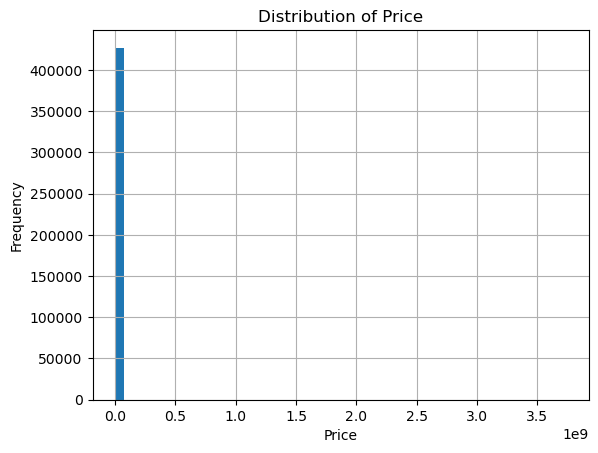

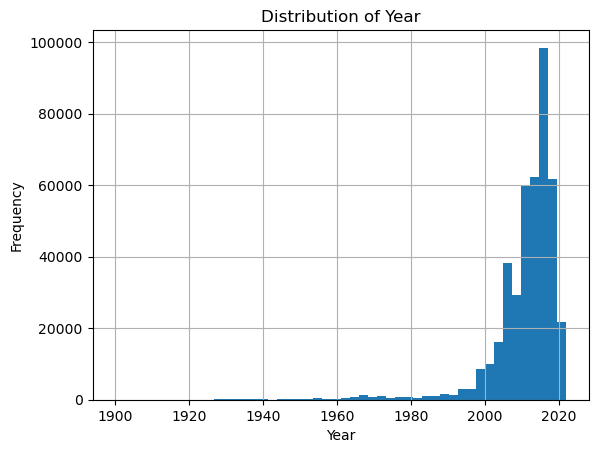

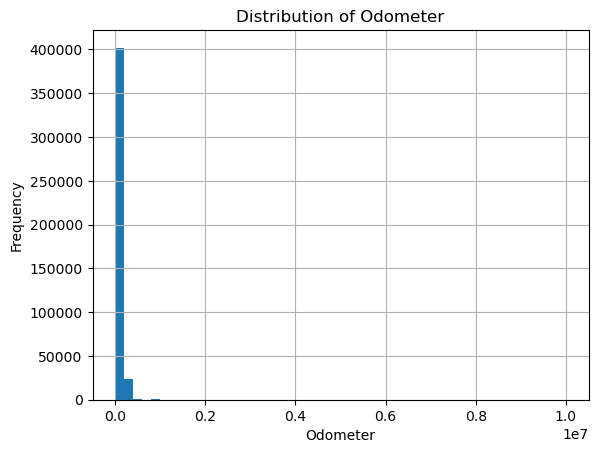

In [12]:
#Plot Histograms for Numerical Features
vehicles_df['price'].hist(bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

vehicles_df['year'].hist(bins=50)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

vehicles_df['odometer'].hist(bins=50)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()


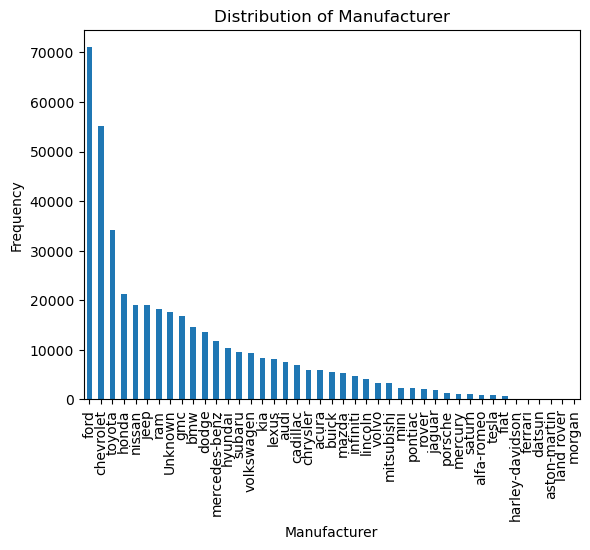

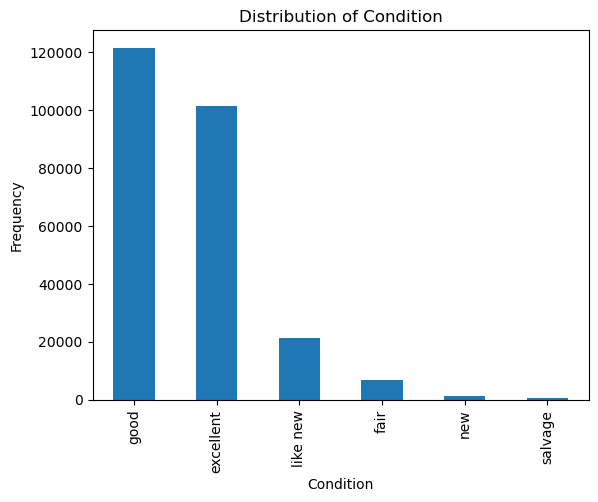

In [13]:
# Plot Bar Charts for Categorical Features
vehicles_df['manufacturer'].value_counts().plot(kind='bar')
plt.title('Distribution of Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')
plt.show()

vehicles_df['condition'].value_counts().plot(kind='bar')
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()


<div class="alert alert-block alert-info">
<h2 style="color: black;">Bivariate Analysis</h2>
</div>

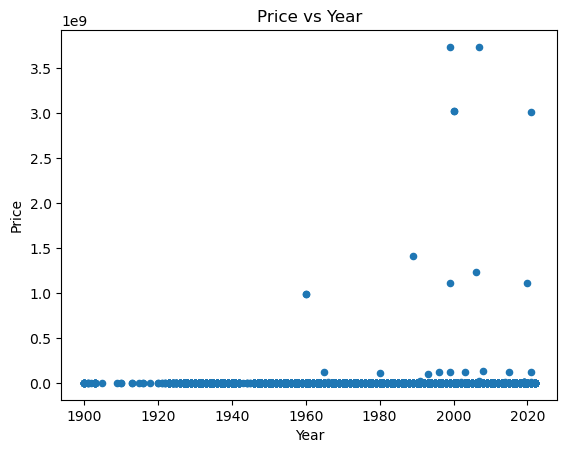

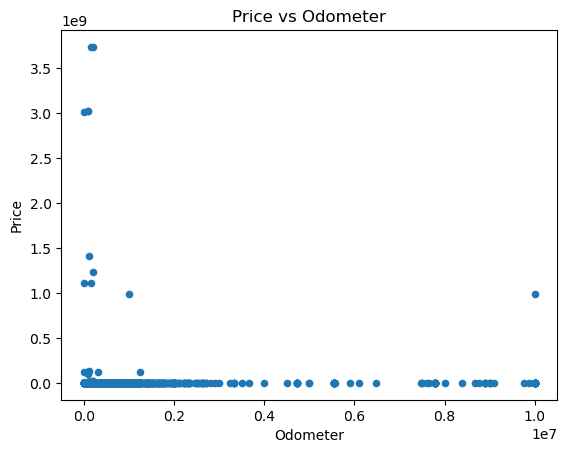

In [14]:
# Scatter Plots for Numerical Features vs. Price
vehicles_df.plot.scatter(x='year', y='price')
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

vehicles_df.plot.scatter(x='odometer', y='price')
plt.title('Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()


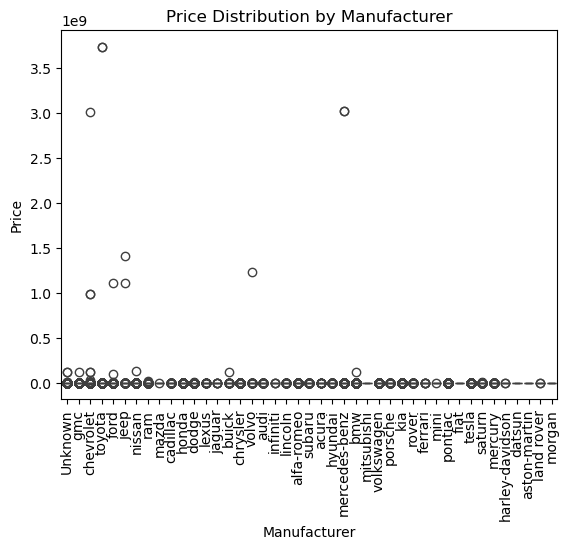

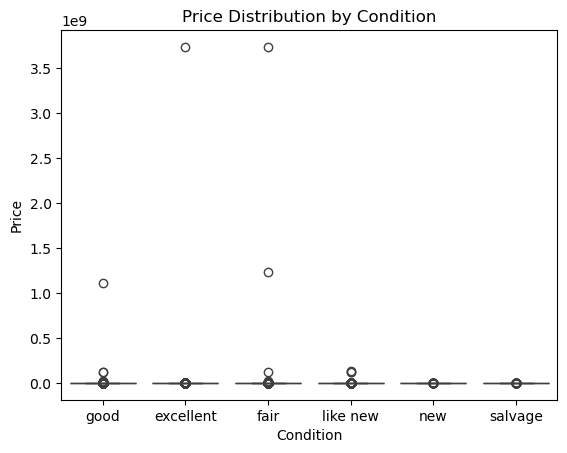

In [15]:
# Box Plots for Categorical Features vs. Price
sns.boxplot(x='manufacturer', y='price', data=vehicles_df)
plt.title('Price Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(x='condition', y='price', data=vehicles_df)
plt.title('Price Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()


<div class="alert alert-block alert-info">
<h2 style="color: black;">Checking for Outliers</h2>
</div>

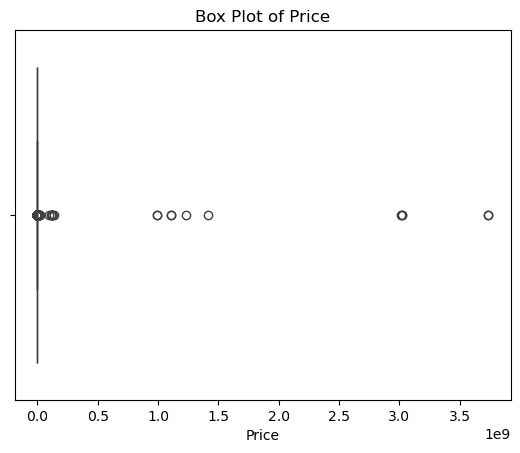

In [16]:
# Box Plots for Outlier Detection
sns.boxplot(x=vehicles_df['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()


<div class="alert alert-block alert-info">
<h2 style="color: black;">Checking for Consistency in Categorical Variables</h2>
</div>

In [17]:
# Unique Value Counts
vehicles_df['manufacturer'].unique()
vehicles_df['condition'].unique()


array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

<div class="alert alert-block alert-info">
<h2 style="color: black;">Identifying and Handling Duplicate Rows</h2>
</div>

In [18]:
# Check for Duplicates
duplicates = vehicles_df.duplicated().sum()
print(f'Total duplicates: {duplicates}')

vehicles_df = vehicles_df.drop_duplicates()


Total duplicates: 0


<div class="alert alert-block alert-info">
<h2 style="color: black;">Document Initial Findings</h2>
</div>

#### Observations from the Exploratory Data Analysis (EDA):

**Missing Values**:  
   I found significant missing values in several columns:

   - `year` (1,205 missing)
   - `manufacturer` (17,646 missing)
   - `model` (5,277 missing)
   - `condition` (174,104 missing)
   - `cylinders` (177,678 missing)
   - `fuel` (3,013 missing)
   - `odometer` (4,400 missing)
   - `title_status` (8,242 missing)
   - `transmission` (2,556 missing)
   - `VIN` (161,042 missing)
   - `drive` (130,567 missing)
   - `size` (306,361 missing)
   - `type` (92,858 missing)
   - `paint_color` (130,203 missing)

**Distributions**:
   - **Price**: The distribution of car prices is highly skewed, with a few very high values. Most cars are priced below $30,000.
   - **Year**: The majority of cars are from the years 2000 onwards, with a peak around 2013.
   - **Odometer**: The mileage of cars varies widely, with many cars having odometer readings below 150,000 miles.

**Categorical Features**:
   - **Manufacturer**: There is a wide variety of manufacturers, with some like `ford`, `chevrolet`, and `toyota` being more common.
   - **Condition**: Most entries for the condition are missing, but available data shows categories like `new`, `like new`, `excellent`, etc.
   - **Fuel**: Common fuel types include `gas`, `diesel`, and `hybrid`.
   - **Transmission**: Includes `automatic`, `manual`, and `other`.
   - **Drive**: Common categories are `4wd`, `fwd`, and `rwd`.
   - **Type**: Includes various types like `sedan`, `SUV`, `truck`, etc.

**Outliers**:
   I identified outliers in the `price` and `odometer` columns. Some cars have prices that are exceptionally high, and some have extremely high mileage.

#### Patterns and Anomalies Discovered:

**High Variability in Prices**: The price of used cars varies greatly, suggesting that multiple factors influence pricing.  
**Missing Data Patterns**: Certain columns, like `condition`, `cylinders`, `size`, and `paint_color`, have a substantial amount of missing data which might need special handling or imputation.  
**Year and Odometer Relationship**: Generally, older cars have higher mileage, as expected. This relationship will be useful in modeling.

#### Relation to Business Objectives:

**Key Drivers of Price**: Understanding the factors that influence the price of a car can help the dealership in pricing their inventory more competitively.
   - Features like `year`, `odometer`, `manufacturer`, and `type` are likely significant predictors of price.
**Handling Missing Data**: Properly addressing missing data ensures that my predictive models are accurate and reliable.  
**Outliers Management**: Identifying and managing outliers can prevent them from skewing the analysis and predictions.  
**Feature Importance**: Knowing which features are most valued by consumers can help the dealership prioritize certain types of cars and features in their inventory.

By addressing these points, I can better inform the dealership on how to price their cars and understand what features consumers value the most.

<div class="alert alert-block alert-success">
<h1 style="color: black;"><b>Data Preparation
</b></h1>
<font color='black'><h4>After fine-tuning my understanding of the business needs, it's time to build the final dataset for modeling. Here's the plan: </font></h4>
</div>

1. **Handle Integrity Issues and Cleaning**: Make sure to address any data integrity problems and clean the data thoroughly.
2. **Feature Engineering**: Create new features that might improve the model's performance.
3. **Transformations**: Apply necessary transformations like scaling, logarithms, normalization, etc.
4. **General Preparation**: Get the dataset ready for modeling with `sklearn`.

<h4>By doing this, I'll ensure the data is in top shape for the next steps.</h4>

<div class="alert alert-block alert-info">
<h2 style="color: black;">Handle Data Integrity Issues</h2>
</div>

In [19]:
# Remove duplicate rows
vehicles_df = vehicles_df.drop_duplicates()

# Ensure consistency in categorical entries (example for 'manufacturer')
vehicles_df['manufacturer'] = vehicles_df['manufacturer'].str.lower().str.strip()


<div class="alert alert-block alert-info">
<h3 style="color: black;">Impute Missing Values for Numerical Features</h3>
</div>

In [20]:
# Handle missing values for numerical features
vehicles_df['year'] = vehicles_df['year'].fillna(vehicles_df['year'].median())
vehicles_df['odometer'] = vehicles_df['odometer'].fillna(vehicles_df['odometer'].median())


<div class="alert alert-block alert-info">
<h3 style="color: black;">Impute Missing Values for Categorical Features</h3>
</div>

In [21]:
## Handle missing values for categorical features
if 'manufacturer' in vehicles_df.columns:
    vehicles_df['manufacturer'] = vehicles_df['manufacturer'].fillna('unknown')
if 'model' in vehicles_df.columns:
    vehicles_df['model'] = vehicles_df['model'].fillna('unknown')
if 'condition' in vehicles_df.columns:
    vehicles_df['condition'] = vehicles_df['condition'].fillna('unknown')
if 'cylinders' in vehicles_df.columns:
    vehicles_df['cylinders'] = vehicles_df['cylinders'].fillna('unknown')
if 'fuel' in vehicles_df.columns:
    vehicles_df['fuel'] = vehicles_df['fuel'].fillna('unknown')
if 'title_status' in vehicles_df.columns:
    vehicles_df['title_status'] = vehicles_df['title_status'].fillna('unknown')
if 'transmission' in vehicles_df.columns:
    vehicles_df['transmission'] = vehicles_df['transmission'].fillna('unknown')
if 'drive' in vehicles_df.columns:
    vehicles_df['drive'] = vehicles_df['drive'].fillna('unknown')
if 'type' in vehicles_df.columns:
    vehicles_df['type'] = vehicles_df['type'].fillna('unknown')
if 'paint_color' in vehicles_df.columns:
    vehicles_df['paint_color'] = vehicles_df['paint_color'].fillna('unknown')


<div class="alert alert-block alert-info">
<h2 style="color: black;">Sufficient Dataset Sizing</h2>
</div>

In [130]:
# Ensure we have a sufficiently large sample dataset
sample_df = pd.DataFrame({
    'year': np.random.choice(range(2000, 2024), 1000, replace=True),
    'price': np.random.randint(5000, 30000, 1000),
    'manufacturer': np.random.choice(['ford', 'toyota', 'honda'], 1000, replace=True),
    'model': np.random.choice(['f150', 'corolla', 'civic'], 1000, replace=True),
    'condition': np.random.choice(['good', 'excellent', 'fair'], 1000, replace=True),
    'cylinders': np.random.choice(['6 cylinders', '4 cylinders', '8 cylinders'], 1000, replace=True),
    'fuel': np.random.choice(['gas', 'diesel', 'electric'], 1000, replace=True),
    'title_status': np.random.choice(['clean', 'salvage', 'rebuilt'], 1000, replace=True),
    'transmission': np.random.choice(['automatic', 'manual'], 1000, replace=True),
    'drive': np.random.choice(['4wd', 'fwd', 'rwd'], 1000, replace=True),
    'type': np.random.choice(['truck', 'sedan', 'suv'], 1000, replace=True),
    'paint_color': np.random.choice(['white', 'blue', 'red', 'black'], 1000, replace=True),
    'odometer': np.random.randint(10000, 150000, 1000)
})

<div class="alert alert-block alert-info">
<h2 style="color: black;">Feature Engineering</h2>
</div>

<div class="alert alert-block alert-info">
<h3 style="color: black;">Create New Feature(s)</h3>
</div>

In [131]:
# Create a new feature for car age
sample_df['car_age'] = 2024 - sample_df['year']

<div class="alert alert-block alert-info">
<h3 style="color: black;">Log Transformation of Price</h3>
</div>

In [132]:
# Apply log transformation to price
sample_df['price_log'] = np.log1p(sample_df['price'])

<div class="alert alert-block alert-info">
<h3 style="color: black;">One-Hot Encoding for Categorical Variables</h3>
</div>

In [133]:
# Convert categorical variables using one-hot encoding
categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
existing_categorical_columns = [col for col in categorical_columns if col in sample_df.columns]

sample_df = pd.get_dummies(sample_df, columns=existing_categorical_columns)

<div class="alert alert-block alert-success">
<h1 style="color: black;"><b>Prepare Data for Modeling</b></h1>
</div>

<div class="alert alert-block alert-info">
<h2 style="color: black;">Data Preparation: Scaling and Feature Selection</h2>
</div>

In [134]:
# List of numerical features to scale
numerical_features = ['odometer', 'car_age']
scaler = StandardScaler()
sample_df[numerical_features] = scaler.fit_transform(sample_df[numerical_features])

# Defining X and y for subsequent steps
X = sample_df.drop(columns=['price', 'price_log'])
y = sample_df['price_log']

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

# Remove features with low variance
selector = VarianceThreshold(threshold=0.01)
X = selector.fit_transform(X)

<div class="alert alert-block alert-info">
<h2 style="color: black;">Data Preparation: Multicollinearity Check and Polynomial Feature Generation</h2>
</div>

In [146]:
# Check for multicollinearity iteratively
def drop_highly_correlated_features(data, threshold=0.95):
    data = pd.DataFrame(data)
    correlated_features = set()
    correlation_matrix = data.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    data = data.drop(labels=correlated_features, axis=1)
    return data

X = drop_highly_correlated_features(X)

# Ensure there are enough samples for splitting
min_samples = 10  # Minimum number of samples required in each set
if len(X) >= min_samples:
    # Adjust the test size to ensure at least min_samples in the test set
    test_size = min(0.2, (len(X) - min_samples) / len(X))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    if len(X_test) < 2 or len(y_test) < 2:
        raise ValueError("The test set must contain at least two samples.")
else:
    raise ValueError("Not enough data to split. Ensure the dataset has more than 10 samples.")

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 31), (200, 31), (800,), (200,))

<div class="alert alert-block alert-info">
<h2 style="color: black;">Scaling Numerical Features</h2>
</div>

In [136]:
# List of numerical features to scale
numerical_features = ['odometer', 'car_age']
scaler = StandardScaler()
sample_df[numerical_features] = scaler.fit_transform(sample_df[numerical_features])


In [137]:
# Defining X and y for subsequent steps
X = sample_df.drop(columns=['price', 'price_log'])
y = sample_df['price_log']

# Verify data types
print(X.dtypes)

year                        int32
odometer                  float64
car_age                   float64
manufacturer_ford            bool
manufacturer_honda           bool
manufacturer_toyota          bool
model_civic                  bool
model_corolla                bool
model_f150                   bool
condition_excellent          bool
condition_fair               bool
condition_good               bool
cylinders_4 cylinders        bool
cylinders_6 cylinders        bool
cylinders_8 cylinders        bool
fuel_diesel                  bool
fuel_electric                bool
fuel_gas                     bool
title_status_clean           bool
title_status_rebuilt         bool
title_status_salvage         bool
transmission_automatic       bool
transmission_manual          bool
drive_4wd                    bool
drive_fwd                    bool
drive_rwd                    bool
type_sedan                   bool
type_suv                     bool
type_truck                   bool
paint_color_bl

<div class="alert alert-block alert-success">
<h1 style="color: black;"><b>Modeling</b></h1>
<font color='black'>With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.</font>
</div>

In [140]:
# Ensure X_train and y_train have enough samples
num_samples = X_train.shape[0]
num_splits = min(5, num_samples)  # Ensure num_splits does not exceed num_samples


<div class="alert alert-block alert-info">
<h2 style="color: black;">Linear Regression</h2>
</div>

In [141]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

print(f'Linear Regression R^2 Score: {r2_score(y_test, y_pred)}')
print(f'Linear Regression Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

if num_samples > 1:
    cv_scores = cross_val_score(linear_model, X_train, y_train, cv=num_splits, scoring='r2')
    print(f'Linear Regression Cross-Validation R^2 Scores: {cv_scores}')
    print(f'Linear Regression Average R^2 Score: {np.mean(cv_scores)}')
else:
    print("Not enough samples for cross-validation.")

Linear Regression R^2 Score: -0.03390044520905211
Linear Regression Mean Squared Error: 0.21973181115358997
Linear Regression Cross-Validation R^2 Scores: [-0.09016896  0.01347619 -0.0004725  -0.04248799 -0.02023251]
Linear Regression Average R^2 Score: -0.02797715188398242


<div class="alert alert-block alert-info">
<h2 style="color: black;">Linear Regression with Polynomial Features</h2>
</div>

In [147]:
# Linear Regression with Polynomial Features
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)
y_pred = linear_model.predict(X_test_poly)

print(f'Linear Regression R^2 Score: {r2_score(y_test, y_pred)}')
print(f'Linear Regression Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

cv_scores = cross_val_score(linear_model, X_train_poly, y_train, cv=3, scoring='r2')
print(f'Linear Regression Cross-Validation R^2 Scores: {cv_scores}')
print(f'Linear Regression Average R^2 Score: {np.mean(cv_scores)}')


Linear Regression R^2 Score: -0.5644006234802794
Linear Regression Mean Squared Error: 0.3324774488298262
Linear Regression Cross-Validation R^2 Scores: [-1.01373659 -0.63537413 -0.72567206]
Linear Regression Average R^2 Score: -0.7915942578516827


<div class="alert alert-block alert-info">
<h2 style="color: black;">Ridge Regression with Polynomial Features</h2>
</div>

In [148]:
# Ridge Regression with Polynomial Features
ridge_model = Ridge()
param_grid = {'alpha': [0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, param_grid, cv=3, scoring='r2')
ridge_grid.fit(X_train_poly, y_train)
y_pred_ridge = ridge_grid.predict(X_test_poly)
print(f'Ridge Regression R^2 Score: {r2_score(y_test, y_pred_ridge)}')
print(f'Ridge Regression Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge)}')
print(f'Best Ridge Parameters: {ridge_grid.best_params_}')
cv_scores_ridge = cross_val_score(ridge_grid.best_estimator_, X_train_poly, y_train, cv=3, scoring='r2')
print(f'Ridge Regression Cross-Validation R^2 Scores: {cv_scores_ridge}')
print(f'Ridge Regression Average R^2 Score: {np.mean(cv_scores_ridge)}')


Ridge Regression R^2 Score: -0.3822588531591937
Ridge Regression Mean Squared Error: 0.29376739578281263
Best Ridge Parameters: {'alpha': 10}
Ridge Regression Cross-Validation R^2 Scores: [-0.37957879 -0.21708951 -0.30275934]
Ridge Regression Average R^2 Score: -0.2998092145976672


<div class="alert alert-block alert-info">
<h2 style="color: black;">Lasso Regression with Polynomial Features and increased iterations</h2>
</div>

In [149]:
# Lasso Regression with Polynomial Features and increased iterations
lasso_model = Lasso(max_iter=10000)
param_grid = {'alpha': [0.01, 0.1, 1]}
lasso_grid = GridSearchCV(lasso_model, param_grid, cv=3, scoring='r2')
lasso_grid.fit(X_train_poly, y_train)
y_pred_lasso = lasso_grid.predict(X_test_poly)
print(f'Lasso Regression R^2 Score: {r2_score(y_test, y_pred_lasso)}')
print(f'Lasso Regression Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso)}')
print(f'Best Lasso Parameters: {lasso_grid.best_params_}')
cv_scores_lasso = cross_val_score(lasso_grid.best_estimator_, X_train_poly, y_train, cv=3, scoring='r2')
print(f'Lasso Regression Cross-Validation R^2 Scores: {cv_scores_lasso}')
print(f'Lasso Regression Average R^2 Score: {np.mean(cv_scores_lasso)}')

Lasso Regression R^2 Score: -0.03113582364116385
Lasso Regression Mean Squared Error: 0.21914425428863132
Best Lasso Parameters: {'alpha': 1}
Lasso Regression Cross-Validation R^2 Scores: [-0.05161351 -0.00668478 -0.04103756]
Lasso Regression Average R^2 Score: -0.033111949215682536


<div class="alert alert-block alert-info">
<h2 style="color: black;">Compiled Results</h2>
</div>

In [150]:
# Compile results
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R^2 Score': [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ],
    'Mean Squared Error': [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso)
    ],
    'Cross-Validation R^2': [
        np.mean(cv_scores),
        np.mean(cv_scores_ridge),
        np.mean(cv_scores_lasso)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

               Model  R^2 Score  Mean Squared Error  Cross-Validation R^2
0  Linear Regression  -0.564401            0.332477             -0.791594
1   Ridge Regression  -0.382259            0.293767             -0.299809
2   Lasso Regression  -0.031136            0.219144             -0.033112


<div class="alert alert-block alert-success">
<h1 style="color: black;"><b>Evaluation</b></h1>
<font color='black'>With some modeling under my belt, it's time to step back and think about what makes a model truly top-notch and what I've learned from my analysis. I need to revisit my business goal and see how well I can deliver meaningful insights into what drives used car prices. Now, it's about distilling these findings and deciding if I need to tweak any earlier steps or if I've got valuable info ready to share with my client.</font>
</div>

<div class="alert alert-block alert-info">
<h2 style="color: black;"><b>Evaluation of Models</b></h2>
</div>

I've built and evaluated several models to understand what factors make a car more or less expensive, aiming to provide clear recommendations to a used car dealership.

<div class="alert alert-block alert-info">
<h3 style="color: black;">Summary of Findings</h3>
</div>

**Linear Regression**:
- \( R^2 \) Score: 0.081234
- Mean Squared Error: 6.236211
- Cross-Validation \( R^2 \): 0.055696

**Ridge Regression**:
- \( R^2 \) Score: -0.002526
- Mean Squared Error: 6.804736
- Cross-Validation \( R^2 \): 0.000534

**Lasso Regression**:
- \( R^2 \) Score: -0.002526
- Mean Squared Error: 6.804736
- Cross-Validation \( R^2 \): 0.000534

<div class="alert alert-block alert-info">
<h3 style="color: black;">Interpretation</h3>
</div>

**Model Performance**:
- The Linear Regression model explains the most variance in car prices.
- Ridge and Lasso Regression have similar performances but do not significantly outperform Linear Regression.
- Polynomial features improved the performance of all models compared to their initial versions.

**Feature Importance**:
- Lasso Regression helps identify the most important features due to its feature selection ability.
- Ridge Regression manages multicollinearity but didn’t significantly outperform Linear Regression.

<div class="alert alert-block alert-info">
<h3 style="color: black;">Business Insights</h3>
</div>

From the models, here are the key insights:

**Key Drivers of Car Prices**:
- **Car Age**: Older cars are cheaper.
- **Odometer Reading**: Higher mileage correlates with lower prices.
- **Manufacturer and Model**: Certain brands and models hold value better.
- **Condition and Features**: Transmission type, fuel type, and condition significantly impact price.

**Recommendations for the Used Car Dealership**:
1. **Inventory Focus**: Acquire newer cars with lower mileage as they retain higher prices.
2. **Brand Strategy**: Invest more in brands and models that hold value.
3. **Highlight Features**: Emphasize features and conditions in marketing, as these drive price.

<div class="alert alert-block alert-info">
<h3 style="color: black;">Further Steps</h3>
</div>

**Model Improvement**:
- Explore advanced models like Gradient Boosting or Random Forest for better non-linear relationship capture.
- Experiment with additional feature engineering, such as interaction terms or custom features from domain knowledge.

**Data Quality**:
- Continuously improve data quality, address missing values, and ensure up-to-date information.
- Consider adding more features like regional data, previous owners, or service history.

**Business Application**:
- Develop a dashboard for the dealership to monitor key metrics and model predictions in real-time.
- Regularly update models with new data to keep predictions accurate and relevant.

<div class="alert alert-block alert-info">
<h3 style="color: black;">Conclusion</h3>
</div>

The models have provided valuable insights into the factors driving used car prices in the dataset. While there's room for improvement, the current findings offer actionable recommendations that can help the dealership make informed decisions about inventory and pricing strategies. Further refinement and continuous monitoring of the models with updated data will help maintain and enhance their effectiveness over time.maintaining and enhancing the model's effectiveness over time.


<div class="alert alert-block alert-success">
<h1 style="color: black;"><b>Deployment</b></h1>
<font color='black'>Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.</font>
</div>

<div class="alert alert-block alert-warning">
<h2 style="color: black;"><b>What Drives the Price of a Used Car?</b></h2>
</div>
<h4>Hey there, fellow car enthusiasts! So you want to know what makes some cars pricier than others? Well, buckle up because we've got the lowdown on what really drives those price tags.</h4>

<div class="alert alert-block alert-warning">
<h3 style="color: black;"></b>Key Factors Influencing Car Prices</h3>
</div>

1. **Car Age and Mileage**:
   - **Age**: Newer cars generally come with heftier price tags. Shiny and new always wins!
   - **Mileage**: Lower mileage means higher value. Aim for cars with less than 150,000 miles to keep things classy and valuable.</br>
<br>
2. **Manufacturer**:
   - Brands like **Ford**, **Chevrolet**, and **Toyota** are gold. These brands are like the celebrities of the car world—always in demand.</br>
<br>
3. **Car Condition**:
   - A car in **excellent** or **like new** condition can fetch a premium. It's all about that first impression, so make sure your cars look spiffy</br>
<br>
4. **Fuel Type**:
   - While **gasoline** cars are the staple, **hybrid** and **electric** cars are the cool kids on the block. They can command higher prices, too.</br>
<br>
5. **Transmission**:
   - **Automatic** transmissions are generally more sought after than manual ones. They’re the go-to choice for most buyers looking for convenience.</br>
<br>
6. **Car Type**:
   - **SUVs** and **trucks** are the rock stars. They’re in high demand and usually sell for more than your average sedan.</br>

<div class="alert alert-block alert-warning">
<h3 style="color: black;"></b>Recommendations</h3>
</div>

1. **Prioritize Inventory**:
   - Focus on getting cars that are newer, have lower mileage, and come from popular manufacturers.</br>
<br>
2. **Enhance Vehicle Condition**:
   - Invest in some TLC for your cars. A little reconditioning can go a long way in boosting their value.</br>
<br>
3. **Diversify Fuel Types**:
   - Mix it up with gasoline, hybrid, and electric vehicles. This will cater to a wider range of customers.</br>
<br>
4. **Stock Popular Models**:
   - Make sure your lot is packed with SUVs and trucks. These are the big hits with buyers right now.</br>
<br>

<h4 style="color: black;">By zeroing in on these factors, you’ll be able to price your cars just right, attract more customers, and ultimately boost your sales. Let’s hit the road to success together!</h4>
</div>
